In [1]:
#reading an excel file of adult analysis data and producing/saving the following plots

In [1]:
adult_data = '/home/tli_project/Desktop/Data/controls/adult_1/output/adult_T4_results_new.csv'
tli_data = '/home/tli_project/Desktop/Data/T4/neurons/output/New/'
save_path = '/home/tli_project/Desktop/Data/controls/adult_1/output/fig1_4/'


plot_cols = ['volume', 'net_area', 'area',
                'AP_spread', 'DV_spread',
                'density_2D', 'density_3D', 'object_perimeter', 'convex_perimeter', 
                'circularity', 'compactness', 'surface_area',
                'eccentricity', 'convexity_2D', 'convexity_3D', 'orientation',
                'feret_diameter_max',
                'DGI', 'cen_EP_dis', 'cen_EP_angle']

In [34]:
# plotting settings
# Colors = {'A':'b','B':'g','C':'orange','D':'r'}
# Colors = {'A':'teal','B':'teal','C':'orange','D':'orange'}
plt_order = ['A', 'B', 'C', 'D']
hue_order = ['adult', 'TLI']
x_p = {'A':0,'B':1,'C':2,'D':3}
hue_x_val = {'adult':-.1, 'TLI':.1}
hue_color = {'adult':'violet', 'TLI':'k'}

In [35]:
import utils.datautils as datautils
# from tqdm import tqdm
# import os
from os import path
import re
# import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
# from matplotlib import colors
# import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/output/New/220209_P36_N2_sA.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/220209_P36_N1_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/220127_P36_N1_sD.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/211121_P36.5_N3_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/211121_P36.5_N2_sA.csv']


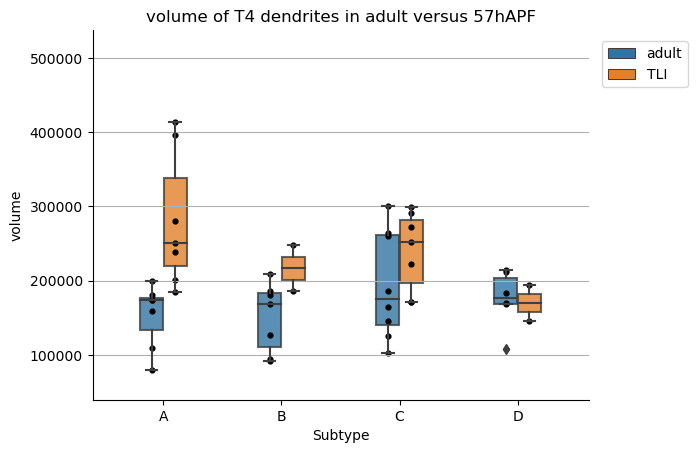

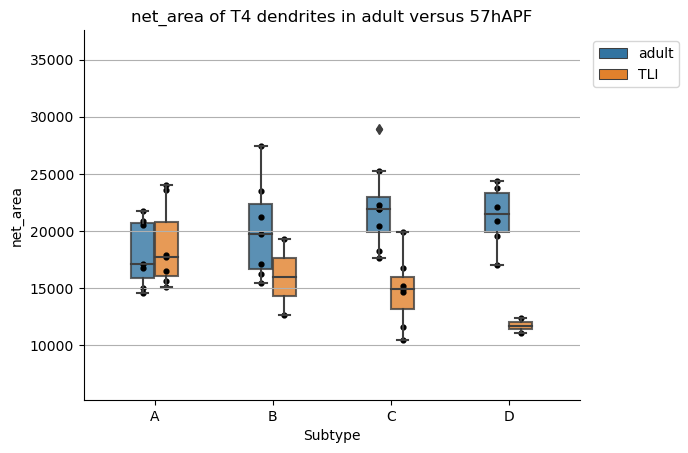

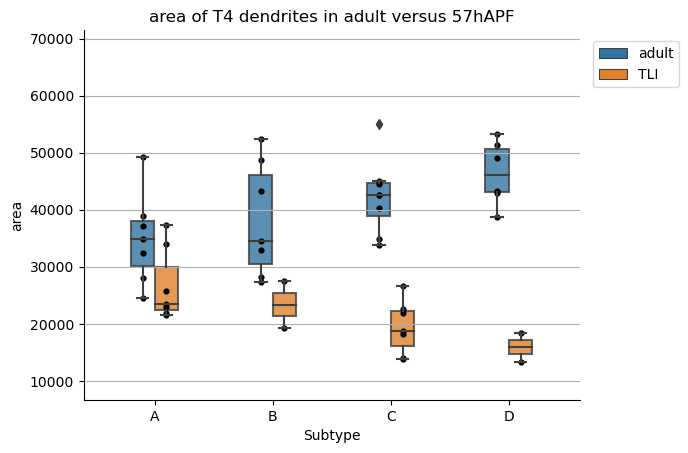

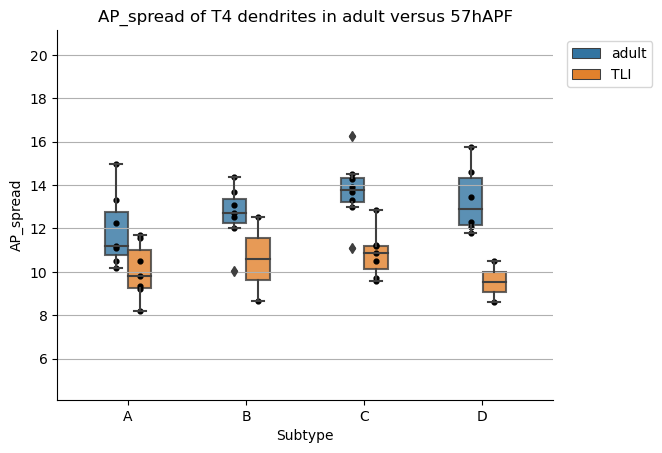

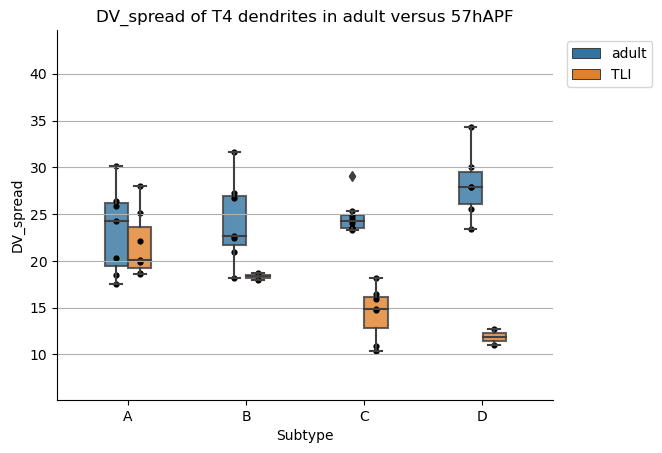

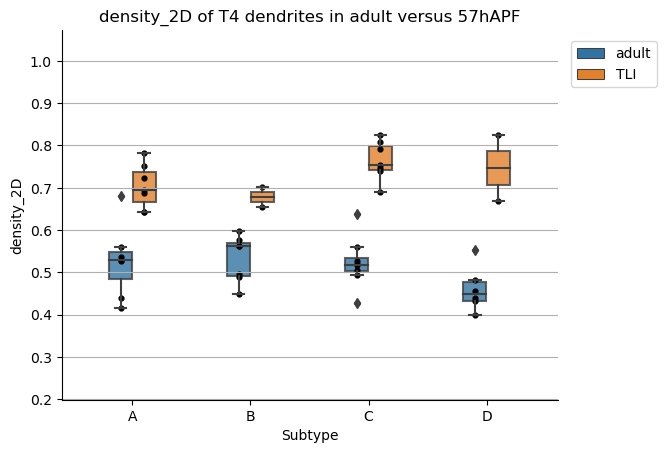

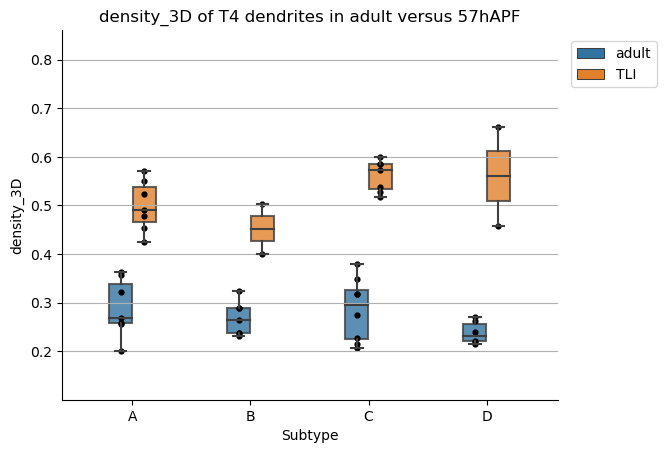

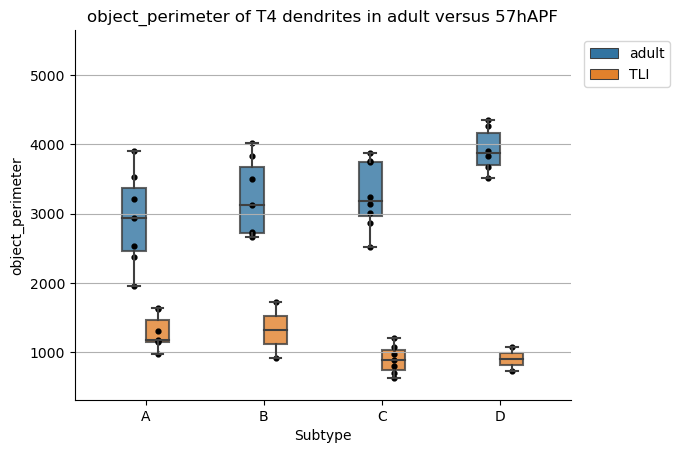

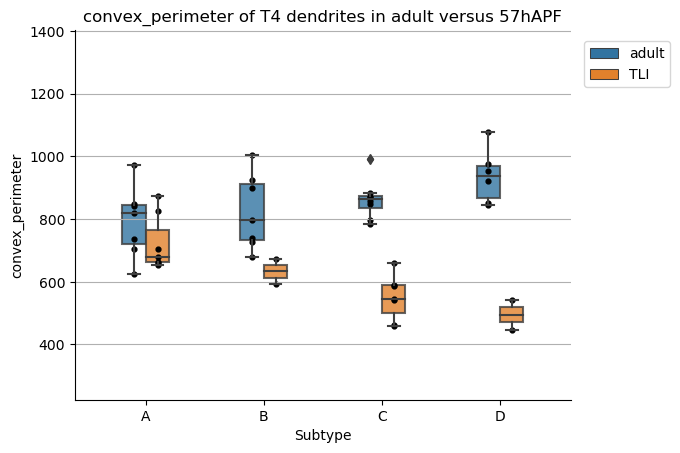

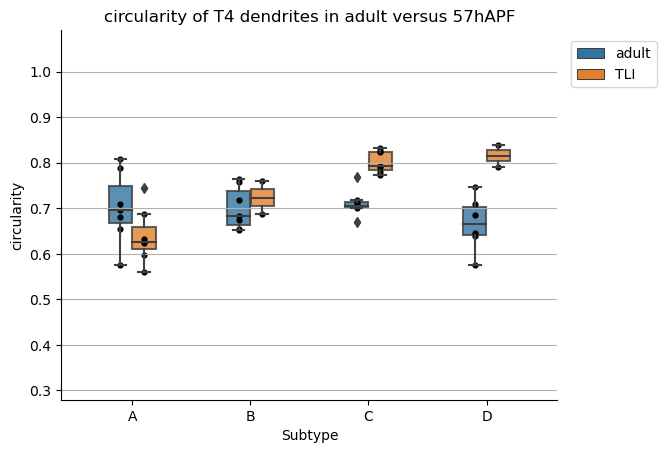

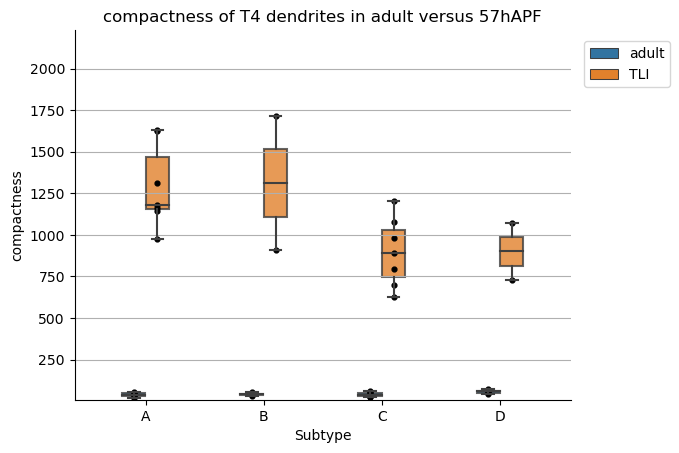

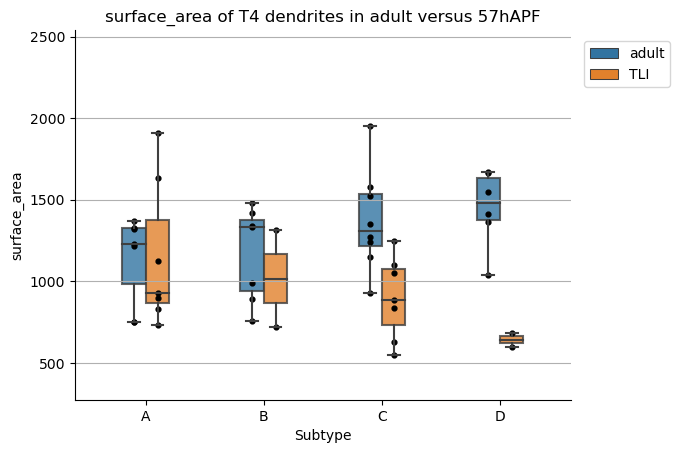

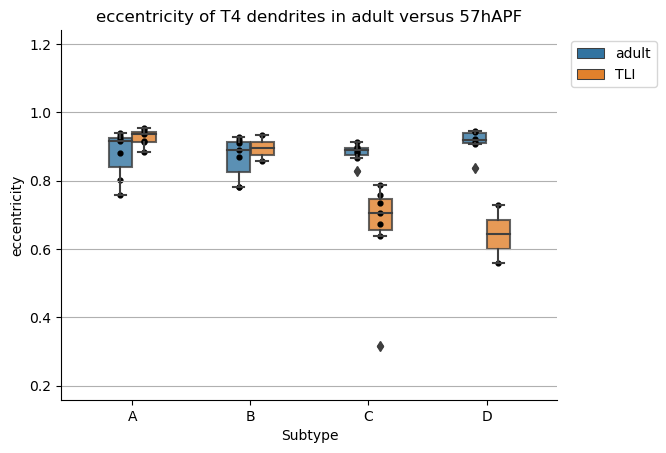

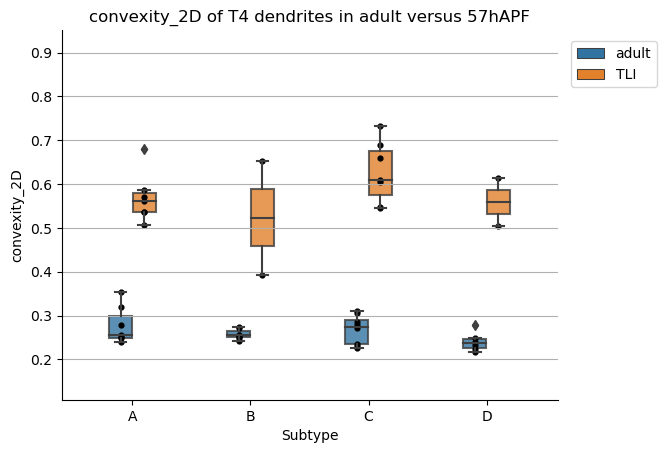

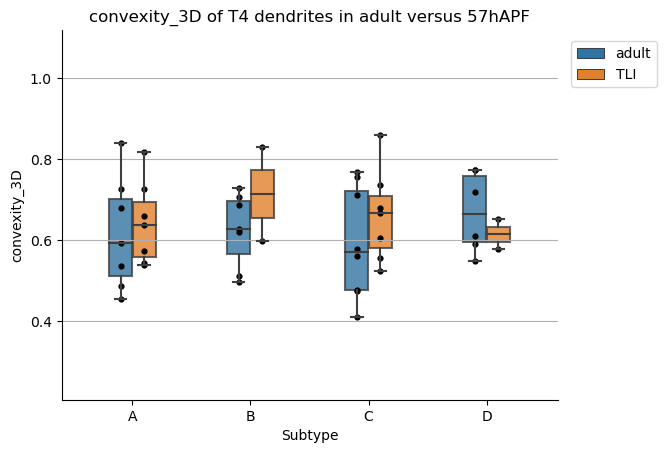

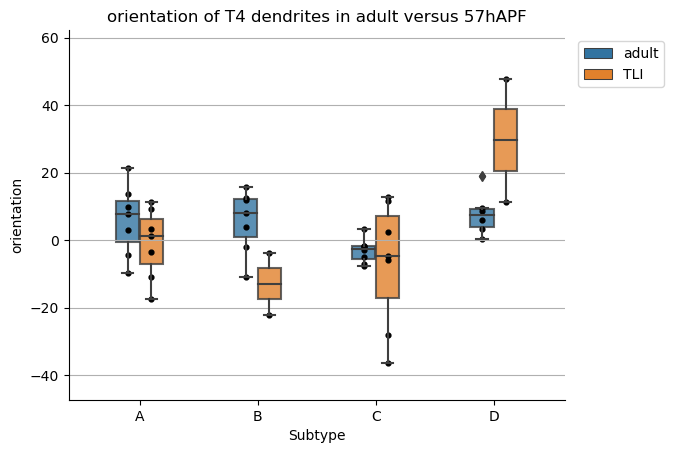

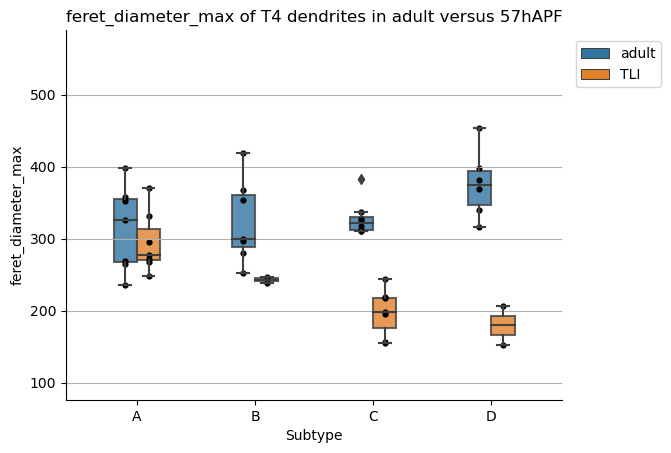

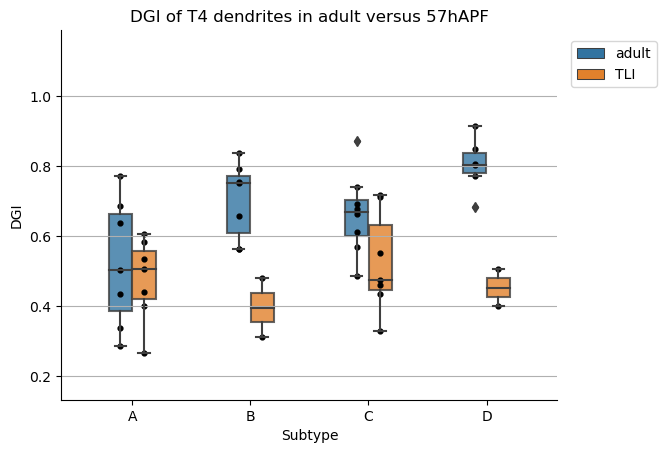

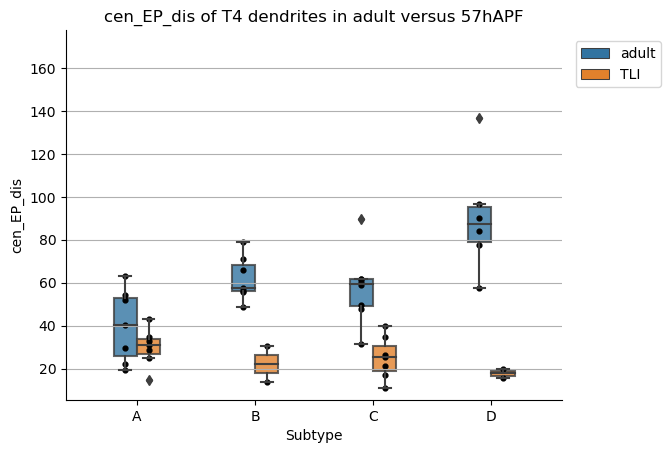

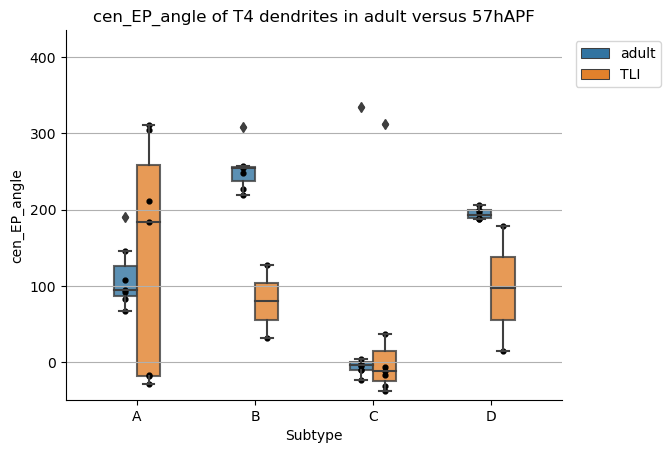

In [36]:
# getting filenames of TLI CSV files and the subtype of each neuron
output_files = datautils.get_file_names(tli_data, group_by='_', order=True, nested_files=False, criteria='.csv')
neu_types = {}
for neu in output_files:
    name = path.splitext(path.basename(neu))[0]
    neu_types[name] = name.split('_s')[1]
neu_types = {'neu_type':list(neu_types.values()),'neu_name':list(neu_types.keys())}
neu_types = pd.DataFrame(neu_types)

for plot_col in plot_cols:
    # read adult CSV file
    results_df = pd.read_csv(adult_data, usecols=['neuron','subtype',plot_col])
    results_df['age'] = ['adult' for i in range(len(results_df))]
    results_df.index = results_df['neuron']
    
    # loading TLI_data
    for file in output_files:
        neu_name = path.basename(file[:file.find('.csv')])
        temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
        subtype = neu_name[-1]
        results_df.loc[neu_name] = [neu_name, subtype, temp_df.loc[80,plot_col], 'TLI']

    fig, ax = plt.subplots(1)

    sns.boxplot(data=results_df, x="subtype", y=plot_col, hue="age",
                order=plt_order, hue_order=None, width=0.4,
                boxprops=dict(alpha=.8))
    
    # y_vals = results_df[plot_col]
    for i,neu in enumerate(results_df[plot_col]):
        x = x_p[results_df.subtype[i]]+hue_x_val[results_df.age[i]]
        ax.scatter(x, neu, c='k', s=12)

    ax.set_title(plot_col+' of T4 dendrites in adult versus 57hAPF')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    sns.despine()
    if results_df[plot_col].min()>0:
        ax.set_ylim(0.5*results_df[plot_col].min(),1.3*results_df[plot_col].max())
    else:
        ax.set_ylim(1.3*results_df[plot_col].min(),1.3*results_df[plot_col].max())

    plt.legend(bbox_to_anchor=(1.2, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_in_adult_vs_TLI_57hAPF.pdf'
    # plt.savefig(save_path+plot_name, facecolor='white', transparent=False)
